In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

In [2]:
# Reading the csv file
df = pd.read_csv("../data/customer_behavior_cleaned.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12120,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12121,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12122,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12124 entries, 0 to 12123
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12124 non-null  int64  
 1   Administrative_Duration  12124 non-null  float64
 2   Informational            12124 non-null  int64  
 3   Informational_Duration   12124 non-null  float64
 4   ProductRelated           12124 non-null  int64  
 5   ProductRelated_Duration  12124 non-null  float64
 6   BounceRates              12124 non-null  float64
 7   ExitRates                12124 non-null  float64
 8   PageValues               12124 non-null  float64
 9   SpecialDay               12124 non-null  float64
 10  Month                    12124 non-null  object 
 11  OperatingSystems         12124 non-null  int64  
 12  Browser                  12124 non-null  int64  
 13  Region                   12124 non-null  int64  
 14  TrafficType           

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Data Transformation

In [5]:
# Separating numerical columns from categorical columns
numerical_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object', 'bool'])

Column: Administrative 1.9446620571685582
Column: Administrative_Duration 5.586783811590166
Column: Informational 4.007287172424463
Column: Informational_Duration 7.525637685731226
Column: ProductRelated 4.3284540917125724
Column: ProductRelated_Duration 7.255543249986457
Column: BounceRates 3.1744158898578654
Column: ExitRates 2.240981807473279
Column: PageValues 6.088080278865735
Column: SpecialDay 3.2721417168090037
Column: OperatingSystems 1.3069071516356172
Column: Browser 2.9852310959309953
Column: Region 0.9821791573023926
Column: TrafficType 1.9314426078088625


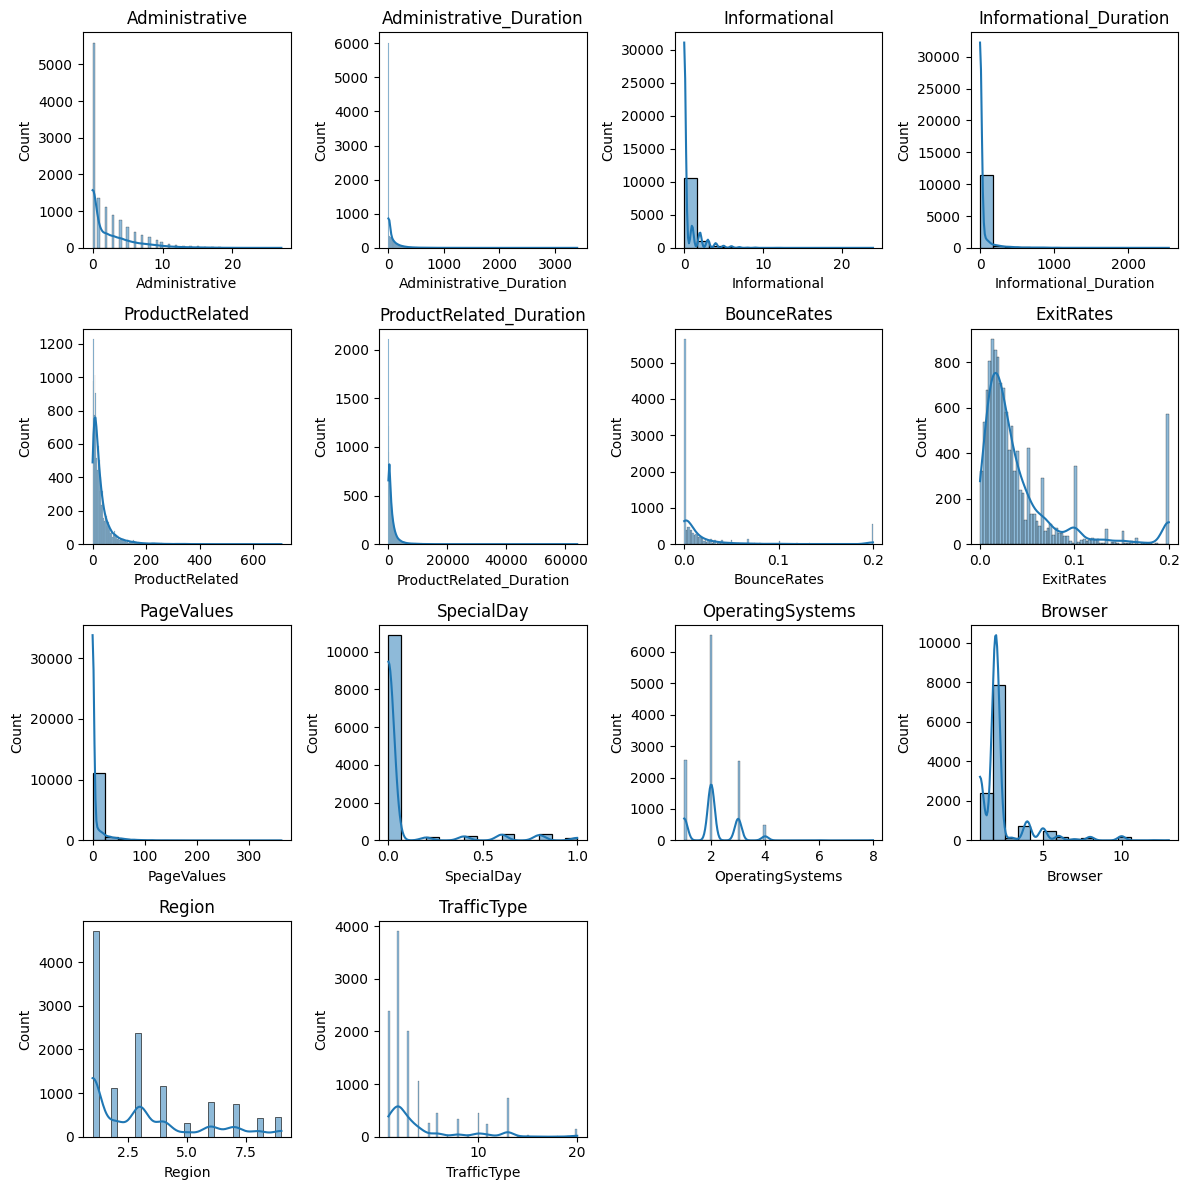

In [6]:
# Plotting the distribution of numerical columns before transformation
plt.figure(figsize=(12, 12))
for index, column in enumerate(numerical_columns, start=1):
    plt.subplot(4, 4, index)  
    sns.histplot(numerical_columns[column], kde=True)
    plt.title(column)
    print("Column:" , column, numerical_columns[column].skew())

plt.tight_layout()
plt.show()

In [7]:
# Creating a directory to store the transformers
transformers_folder = '../transformers'
os.makedirs(transformers_folder, exist_ok=True)

In [8]:
# As the features are heavily skewed, i will apply a power transformer

# Creating and fitting the transformer
pt = PowerTransformer()
pt.fit(numerical_columns)

# Saving the transformer
pt_path = os.path.join(transformers_folder, 'power_transformer.pkl')
with open(pt_path, 'wb') as file:
    pickle.dump(pt, file)

In [9]:
# Loading the transformer
with open(pt_path, 'rb') as file:
    pickled_pt = pickle.load(file)

In [10]:
# Applying the loaded transformer to the dataframe to transform the features
X_num_transformed_arr = pickled_pt.transform(numerical_columns)

# Converting the transformed array back to a DataFrame
X_num_transformed_df = pd.DataFrame(X_num_transformed_arr, columns=numerical_columns.columns)
X_num_transformed_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.999797,-1.006849,-0.525177,-0.496072,-1.985106,-2.174323,2.218313,2.013279,-0.533060,-0.338884,-1.581789,-1.632548,-1.116280,-1.467108
1,-0.999797,-1.006849,-0.525177,-0.496072,-1.628858,-1.121114,-0.805988,1.613689,-0.533060,-0.338884,0.008679,0.105052,-1.116280,-0.386866
2,-0.999797,-1.006849,-0.525177,-0.496072,-1.985106,-2.174323,2.218313,2.013279,-0.533060,-0.338884,1.965748,-1.632548,1.667878,0.203617
3,-0.999797,-1.006849,-0.525177,-0.496072,-1.628858,-1.945246,1.772560,1.869769,-0.533060,-0.338884,1.117170,0.105052,-0.195955,0.581777
4,-0.999797,-1.006849,-0.525177,-0.496072,-0.473098,0.034784,0.826655,0.765416,-0.533060,-0.338884,1.117170,0.934969,-1.116280,0.581777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.831618,1.115498,-0.525177,-0.496072,0.972161,0.801466,-0.069927,0.019868,1.917846,-0.338884,1.965748,1.947729,-1.116280,-1.467108
12120,-0.999797,-1.006849,-0.525177,-0.496072,-1.014983,-0.152623,-0.805988,-0.355037,-0.533060,-0.338884,1.117170,0.105052,-1.116280,1.322635
12121,-0.999797,-1.006849,-0.525177,-0.496072,-0.877623,-0.660390,2.088871,1.468059,-0.533060,-0.338884,1.117170,0.105052,-1.116280,1.700403
12122,1.025797,0.891590,-0.525177,-0.496072,-0.135737,-0.327223,-0.805988,-0.369987,-0.533060,-0.338884,0.008679,0.105052,0.354287,1.582503


Column: Administrative 0.23253554870761367
Column: Administrative_Duration 0.131609197571723
Column: Informational 1.3825736675198468
Column: Informational_Duration 1.524855300923654
Column: ProductRelated -0.0017513347441628375
Column: ProductRelated_Duration -0.02068106690638239
Column: BounceRates 1.0051306502039987
Column: ExitRates 0.4101871311926219
Column: PageValues 1.361251584286644
Column: SpecialDay 2.6125218031649218
Column: OperatingSystems -0.0007306234690778087
Column: Browser -0.00581454134841841
Column: Region 0.1297341970601257
Column: TrafficType 0.14782066877971725


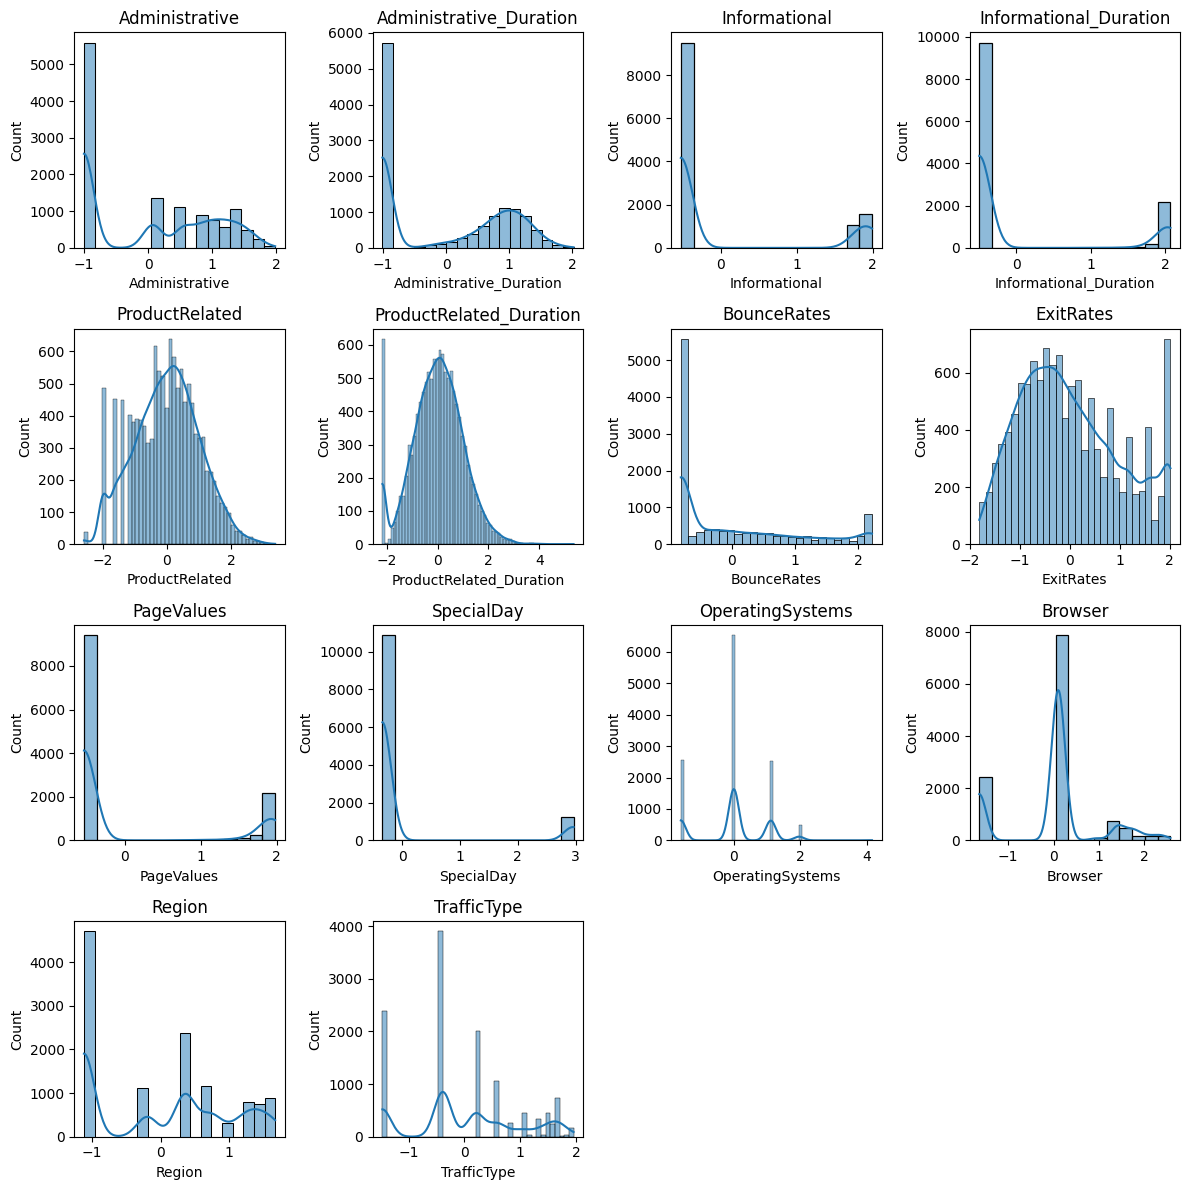

In [11]:
# Plotting the distribution of numerical columns after transformation
plt.figure(figsize=(12, 12))
for index, column in enumerate(X_num_transformed_df, start=1):
    plt.subplot(4, 4, index)  
    sns.histplot(X_num_transformed_df[column], kde=True)
    plt.title(column)
    print("Column:" , column, X_num_transformed_df[column].skew())

plt.tight_layout()
plt.show()

# One Hot Encoding

In [12]:
# Dealing with the categorical columns
categorical_columns.head()

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False


In [13]:
# Applying simple one hot encoding on month column
categorical_columns = pd.get_dummies(categorical_columns, columns=['Month'], drop_first=True, prefix='Month')
categorical_columns.head()

,VisitorType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,Returning_Visitor,False,False,False,True,False,False,False,False,False,False,False
1,Returning_Visitor,False,False,False,True,False,False,False,False,False,False,False
2,Returning_Visitor,False,False,False,True,False,False,False,False,False,False,False
3,Returning_Visitor,False,False,False,True,False,False,False,False,False,False,False
4,Returning_Visitor,True,False,False,True,False,False,False,False,False,False,False


In [14]:
# Applying simple one hot encoding on VisitorType column
categorical_columns = pd.get_dummies(categorical_columns, columns=['VisitorType'], drop_first=True)
categorical_columns.head()

,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Returning_Visitor
0,False,False,False,True,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False,False,False,True
4,True,False,False,True,False,False,False,False,False,False,False,True


In [15]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12124 entries, 0 to 12123
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Weekend                        12124 non-null  bool 
 1   Revenue                        12124 non-null  bool 
 2   Month_Dec                      12124 non-null  bool 
 3   Month_Feb                      12124 non-null  bool 
 4   Month_Jul                      12124 non-null  bool 
 5   Month_June                     12124 non-null  bool 
 6   Month_Mar                      12124 non-null  bool 
 7   Month_May                      12124 non-null  bool 
 8   Month_Nov                      12124 non-null  bool 
 9   Month_Oct                      12124 non-null  bool 
 10  Month_Sep                      12124 non-null  bool 
 11  VisitorType_Returning_Visitor  12124 non-null  bool 
dtypes: bool(12)
memory usage: 142.2 KB


# Type casting

In [16]:
# Converting the boolean generated columns to int, as well as Revenue and Weekend
for col in categorical_columns.columns:
    if categorical_columns[col].dtype== bool:
        categorical_columns[col]=categorical_columns[col].astype(int)

In [17]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12124 entries, 0 to 12123
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Weekend                        12124 non-null  int32
 1   Revenue                        12124 non-null  int32
 2   Month_Dec                      12124 non-null  int32
 3   Month_Feb                      12124 non-null  int32
 4   Month_Jul                      12124 non-null  int32
 5   Month_June                     12124 non-null  int32
 6   Month_Mar                      12124 non-null  int32
 7   Month_May                      12124 non-null  int32
 8   Month_Nov                      12124 non-null  int32
 9   Month_Oct                      12124 non-null  int32
 10  Month_Sep                      12124 non-null  int32
 11  VisitorType_Returning_Visitor  12124 non-null  int32
dtypes: int32(12)
memory usage: 568.4 KB


In [18]:
categorical_columns.describe()

,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Returning_Visitor
count,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000,12124.000000
mean,0.235236,0.156054,0.135929,0.014929,0.035632,0.023425,0.153415,0.274579,0.244144,0.045282,0.036952,0.860360
std,0.424164,0.362922,0.342727,0.121274,0.185378,0.151254,0.360402,0.446320,0.429596,0.207931,0.188651,0.346628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# concatenating the data back into a single df
df = pd.concat([X_num_transformed_df, categorical_columns], axis=1)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Returning_Visitor
0,-0.999797,-1.006849,-0.525177,-0.496072,-1.985106,-2.174323,2.218313,2.013279,-0.533060,-0.338884,...,0,1,0,0,0,0,0,0,0,1
1,-0.999797,-1.006849,-0.525177,-0.496072,-1.628858,-1.121114,-0.805988,1.613689,-0.533060,-0.338884,...,0,1,0,0,0,0,0,0,0,1
2,-0.999797,-1.006849,-0.525177,-0.496072,-1.985106,-2.174323,2.218313,2.013279,-0.533060,-0.338884,...,0,1,0,0,0,0,0,0,0,1
3,-0.999797,-1.006849,-0.525177,-0.496072,-1.628858,-1.945246,1.772560,1.869769,-0.533060,-0.338884,...,0,1,0,0,0,0,0,0,0,1
4,-0.999797,-1.006849,-0.525177,-0.496072,-0.473098,0.034784,0.826655,0.765416,-0.533060,-0.338884,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.831618,1.115498,-0.525177,-0.496072,0.972161,0.801466,-0.069927,0.019868,1.917846,-0.338884,...,1,0,0,0,0,0,0,0,0,1
12120,-0.999797,-1.006849,-0.525177,-0.496072,-1.014983,-0.152623,-0.805988,-0.355037,-0.533060,-0.338884,...,0,0,0,0,0,0,1,0,0,1
12121,-0.999797,-1.006849,-0.525177,-0.496072,-0.877623,-0.660390,2.088871,1.468059,-0.533060,-0.338884,...,0,0,0,0,0,0,1,0,0,1
12122,1.025797,0.891590,-0.525177,-0.496072,-0.135737,-0.327223,-0.805988,-0.369987,-0.533060,-0.338884,...,0,0,0,0,0,0,1,0,0,1


# Scaling the Data

In [20]:
# Creating a directory to store the scalers
scalers_folder = '../scalers'
os.makedirs(scalers_folder, exist_ok=True)

In [21]:
# I will apply a MinMax scaler, so that all the variables are in the same range

# Creating and fitting the scaler
scaler1 = MinMaxScaler()
scaler1.fit(df)

# Saving the scaler
scaler1_path = os.path.join(scalers_folder, 'minmax_scaler.pkl')
with open(scaler1_path, 'wb') as file:
    pickle.dump(scaler1, file)

In [22]:
# Loading the scaler
with open(scaler1_path, 'rb') as file:
    loaded_scaler1 = pickle.load(file)

In [23]:
# Applying the loaded scaler to the dataframe to scale the features
data_arr = loaded_scaler1.transform(df)

# Converting the scaled array back to a DataFrame
scaled_df = pd.DataFrame(data_arr, columns=df.columns)
scaled_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Returning_Visitor
0,0.000000,0.000000,0.0,0.0,0.101239,0.000000,1.000000,1.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000000,0.0,0.0,0.160932,0.140022,0.000000,0.895652,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.000000,0.0,0.0,0.101239,0.000000,1.000000,1.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.000000,0.0,0.0,0.160932,0.030455,0.852610,0.962524,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.000000,0.0,0.0,0.354593,0.293695,0.539841,0.674136,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.614678,0.701446,0.0,0.0,0.596763,0.395624,0.243382,0.479445,0.975626,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12120,0.000000,0.000000,0.0,0.0,0.263794,0.268780,0.000000,0.381543,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12121,0.000000,0.000000,0.0,0.0,0.286810,0.201274,0.957199,0.857622,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12122,0.679851,0.627444,0.0,0.0,0.411122,0.245567,0.000000,0.377639,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Checking for Multiccollinearity

In [24]:
correlation_matrix = (scaled_df.drop("Revenue",axis=1)).corr()
correlation_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Returning_Visitor
Administrative,1.000000,0.953124,0.356276,0.352022,0.451422,0.418615,-0.251146,-0.441298,0.331794,-0.130605,...,-0.014994,-0.087672,0.012951,-0.007970,-0.040114,-0.074865,0.032252,0.110608,0.079896,-0.105517
Administrative_Duration,0.953124,1.000000,0.338432,0.334642,0.423953,0.408479,-0.260248,-0.453129,0.321048,-0.137200,...,-0.008690,-0.092084,0.012222,-0.016174,-0.038107,-0.073439,0.024832,0.116826,0.079988,-0.131148
Informational,0.356276,0.338432,1.000000,0.948109,0.367623,0.366703,-0.082327,-0.194071,0.223696,-0.054583,...,-0.008276,-0.048403,0.007806,0.001113,-0.034332,-0.029448,0.063949,0.009521,0.005854,0.055024
Informational_Duration,0.352022,0.334642,0.948109,1.000000,0.362630,0.362973,-0.088008,-0.205994,0.227769,-0.056648,...,-0.007315,-0.049089,0.007716,0.000644,-0.030592,-0.026631,0.056066,0.014492,0.006996,0.048607
ProductRelated,0.451422,0.423953,0.367623,0.362630,1.000000,0.895209,-0.251004,-0.552881,0.343212,-0.031342,...,-0.015427,-0.097200,0.015321,-0.001328,-0.114812,-0.049829,0.156638,0.016123,0.011817,0.116598
ProductRelated_Duration,0.418615,0.408479,0.366703,0.362973,0.895209,1.000000,-0.296465,-0.528276,0.350343,-0.059273,...,-0.003887,-0.082329,-0.005976,-0.021606,-0.083084,-0.062970,0.160082,0.003836,0.007703,0.102628
BounceRates,-0.251146,-0.260248,-0.082327,-0.088008,-0.251004,-0.296465,1.000000,0.710746,-0.173325,0.156863,...,-0.031839,0.032390,0.043323,0.053767,-0.071725,0.088085,-0.024038,-0.034536,-0.030848,0.246446
ExitRates,-0.441298,-0.453129,-0.194071,-0.205994,-0.552881,-0.528276,0.710746,1.000000,-0.297063,0.161388,...,-0.010993,0.067368,0.025088,0.054443,-0.015326,0.091272,-0.060395,-0.065416,-0.047210,0.266749
PageValues,0.331794,0.321048,0.223696,0.227769,0.343212,0.350343,-0.173325,-0.297063,1.000000,-0.069134,...,-0.022754,-0.055496,0.000585,-0.015640,-0.064437,0.001124,0.053209,0.045857,0.024640,-0.010446
SpecialDay,-0.130605,-0.137200,-0.054583,-0.056648,-0.031342,-0.059273,0.156863,0.161388,-0.069134,1.000000,...,-0.134410,0.134832,-0.065140,-0.052485,-0.144261,0.502851,-0.192599,-0.073804,-0.066381,0.091137


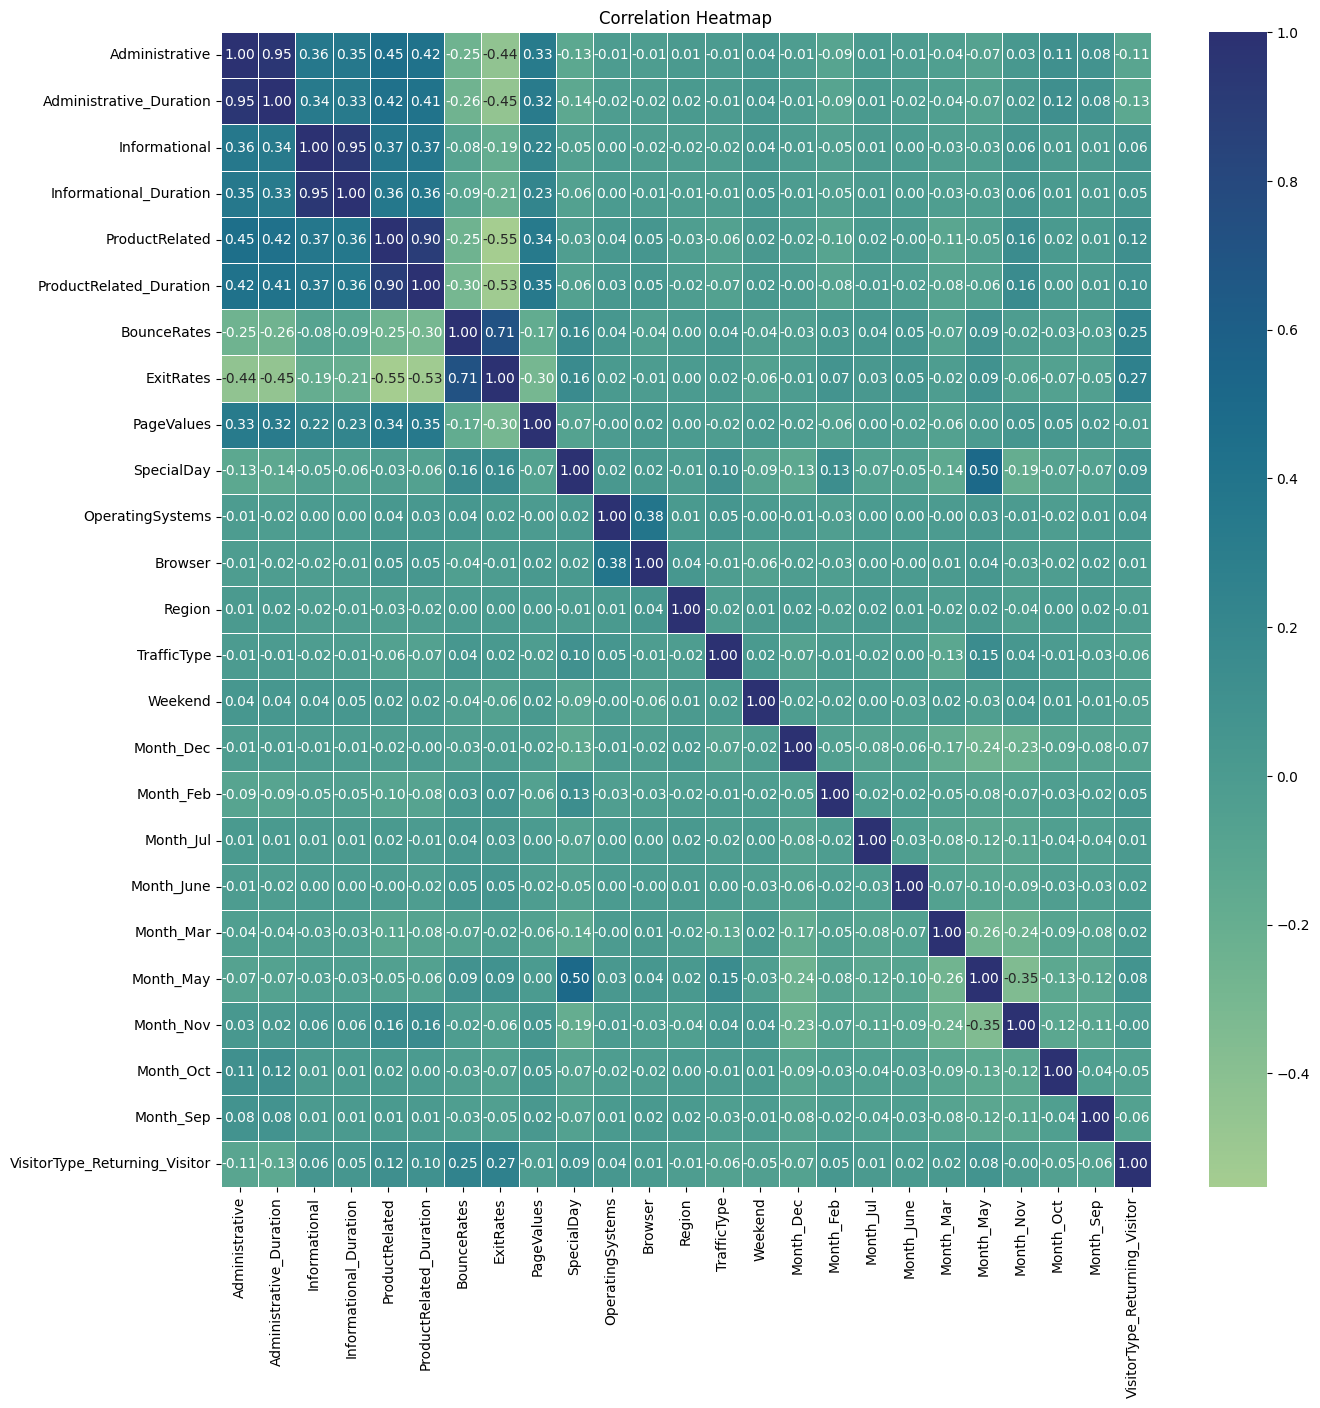

In [25]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Some columns are showing multicollinearity
# I will compute the VIF to decide which columns i will drop

# VIF

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given columns
def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    X.loc[:,'intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

In [28]:
# Columns to consider
selected_columns = list(df.columns)
selected_columns.remove("Revenue")

# compute vif
vif_df = compute_vif(df, selected_columns)
display(vif_df)

# Create new list of columns being dropped
cols_to_drop = []

# Append the columns being dropped to the list
cols_to_drop.append('Revenue')

,Variable,VIF
0,Administrative,11.540093
1,Administrative_Duration,11.397096
2,Informational,10.058816
3,Informational_Duration,9.981336
4,Month_May,6.737510
5,ProductRelated,6.153442
6,Month_Nov,5.974874
7,ProductRelated_Duration,5.395417
8,Month_Mar,4.556208
9,Month_Dec,4.179691


In [29]:
# Drop high VIF columns
selected_columns.remove("Administrative")

# re-compute VIF
vif_df = compute_vif(df, selected_columns)
display(vif_df)

# Append the columns being dropped to the list
cols_to_drop.append('Administrative')

,Variable,VIF
0,Informational,10.056064
1,Informational_Duration,9.980063
2,Month_May,6.737007
3,ProductRelated,5.992084
4,Month_Nov,5.974841
5,ProductRelated_Duration,5.334469
6,Month_Mar,4.556159
7,Month_Dec,4.179375
8,ExitRates,3.390661
9,BounceRates,2.229597


In [30]:
# Drop high VIF columns
selected_columns.remove("Informational")

# re-compute VIF
vif_df = compute_vif(df, selected_columns)
display(vif_df)

# Append the columns being dropped to the list
cols_to_drop.append('Informational')

,Variable,VIF
0,Month_May,6.736409
1,ProductRelated,5.983937
2,Month_Nov,5.974841
3,ProductRelated_Duration,5.333945
4,Month_Mar,4.555816
5,Month_Dec,4.179123
6,ExitRates,3.377321
7,BounceRates,2.228413
8,Month_Oct,2.172853
9,Month_Sep,1.963540


In [31]:
# Drop high VIF columns
selected_columns.remove("Month_May")

# re-compute VIF
vif_df = compute_vif(df, selected_columns)
display(vif_df)

# Append the columns being dropped to the list
cols_to_drop.append('Month_May')

,Variable,VIF
0,ProductRelated,5.975818
1,ProductRelated_Duration,5.332141
2,ExitRates,3.377126
3,BounceRates,2.227739
4,Month_Nov,1.649415
5,Month_Mar,1.498068
6,Administrative_Duration,1.492022
7,Month_Dec,1.436412
8,SpecialDay,1.377712
9,VisitorType_Returning_Visitor,1.248003


In [32]:
# Drop high VIF columns
selected_columns.remove("ProductRelated")

# re-compute VIF
vif_df = compute_vif(df, selected_columns)
display(vif_df)

cols_to_drop.append('ProductRelated')

,Variable,VIF
0,ExitRates,3.008135
1,BounceRates,2.111216
2,ProductRelated_Duration,1.848023
3,Month_Nov,1.645320
4,Month_Mar,1.492463
5,Administrative_Duration,1.484920
6,Month_Dec,1.436347
7,SpecialDay,1.367282
8,Informational_Duration,1.226926
9,VisitorType_Returning_Visitor,1.218554


In [33]:
# The highest VIF remaining is ~3, therefore i will not drop any more columns

In [34]:
scaled_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Returning_Visitor
0,0.000000,0.000000,0.0,0.0,0.101239,0.000000,1.000000,1.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000000,0.0,0.0,0.160932,0.140022,0.000000,0.895652,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.000000,0.0,0.0,0.101239,0.000000,1.000000,1.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.000000,0.0,0.0,0.160932,0.030455,0.852610,0.962524,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.000000,0.0,0.0,0.354593,0.293695,0.539841,0.674136,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.614678,0.701446,0.0,0.0,0.596763,0.395624,0.243382,0.479445,0.975626,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12120,0.000000,0.000000,0.0,0.0,0.263794,0.268780,0.000000,0.381543,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12121,0.000000,0.000000,0.0,0.0,0.286810,0.201274,0.957199,0.857622,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12122,0.679851,0.627444,0.0,0.0,0.411122,0.245567,0.000000,0.377639,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
print(scaled_df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Returning_Visitor'],
      dtype='object')


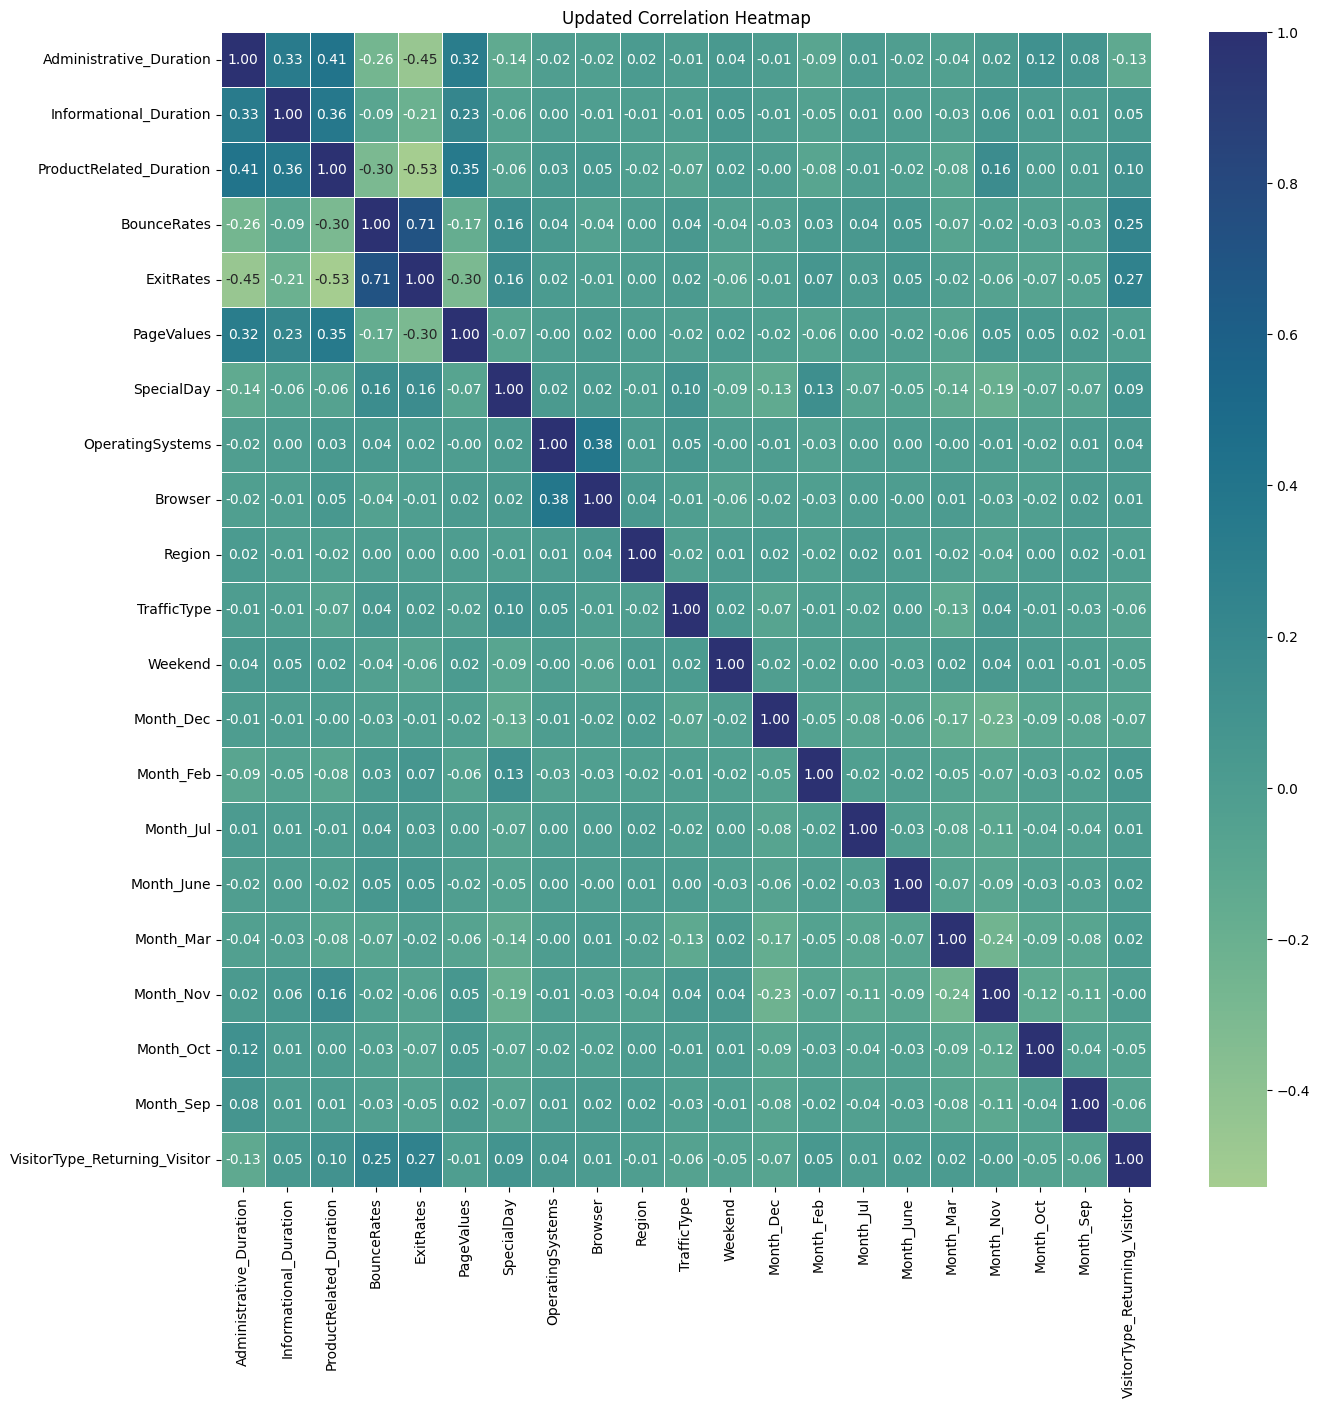

In [36]:
# Specifying the features and target variable
X = scaled_df.drop(columns=cols_to_drop, axis=1)
y = scaled_df['Revenue']

# Print new correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=.5)
plt.title('Updated Correlation Heatmap')
plt.show()

# Train-Test Split

In [37]:
# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [38]:
# Confirming that the column drop was performed correctly
display(X.columns)

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [39]:
y_train.value_counts()

Revenue
0.0    8201
1.0    1498
Name: count, dtype: int64

In [40]:
# As there is obvious class imbalance, we will perform SMOTE

# SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE on the train set
smote = SMOTE(sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [42]:
# Convert the resampled target variable to a pandas Series
y_train_resampled = pd.Series(y_train_resampled)
y_train_resampled.value_counts()

Revenue
0.0    8201
1.0    8201
Name: count, dtype: int64

# Logistic Regression

In [43]:
# Creating the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [44]:
# Creating a directory to store the models
models_folder = '../models'
os.makedirs(models_folder, exist_ok=True)

In [45]:
# Saving the model
logreg_path = os.path.join(models_folder, 'logistic_regression.pkl')
with open(logreg_path, 'wb') as file:
    pickle.dump(logreg, file)

In [46]:
# Loading the model
with open(logreg_path, 'rb') as file:
    loaded_lr = pickle.load(file)

In [47]:
# Using the loaded model to predict y
y_pred = loaded_lr.predict(X_test)

# Calculating the accuracy of the logistic regression model

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91      2031
         1.0       0.55      0.81      0.66       394

    accuracy                           0.86      2425
   macro avg       0.75      0.84      0.78      2425
weighted avg       0.89      0.86      0.87      2425

Kappa score: 0.572


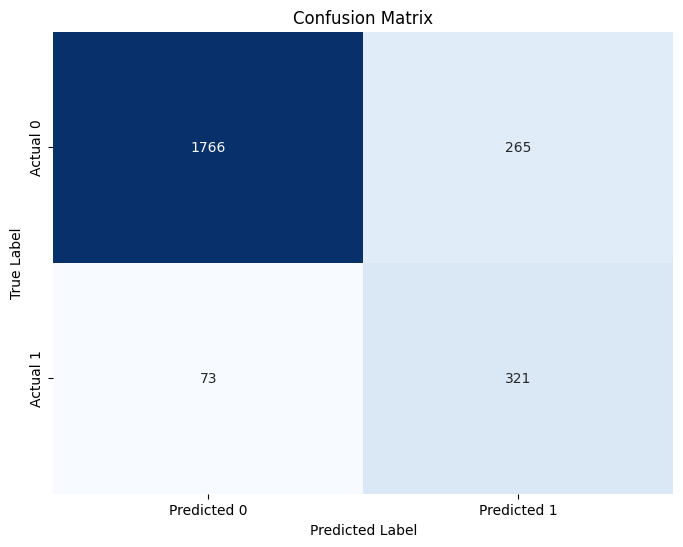

In [48]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report, confusion_matrix

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Random Forest classifier using Gridsearch

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3,5,10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Creating the Random Forest Classifier
rf = RandomForestClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=20)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 1/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 2/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 3/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=

D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\base.py", l

In [50]:
display(best_params)

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 150}

In [51]:
rf_model1 = grid_search.best_estimator_

# Saving the best model to a pickle file
rf_model1_path = os.path.join(models_folder, 'random_forest_model1.pkl')
with open(rf_model1_path, 'wb') as file:
    pickle.dump(rf_model1, file)

In [52]:
# Loading the best model from the pickle file
with open(rf_model1_path, 'rb') as file:
    loaded_rf_model1 = pickle.load(file)

In [53]:
# Predicting y using the loaded model
y_pred2 = loaded_rf_model1.predict(X_test)

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2031
         1.0       0.78      0.58      0.66       394

    accuracy                           0.90      2425
   macro avg       0.85      0.77      0.80      2425
weighted avg       0.90      0.90      0.90      2425

Kappa score: 0.611


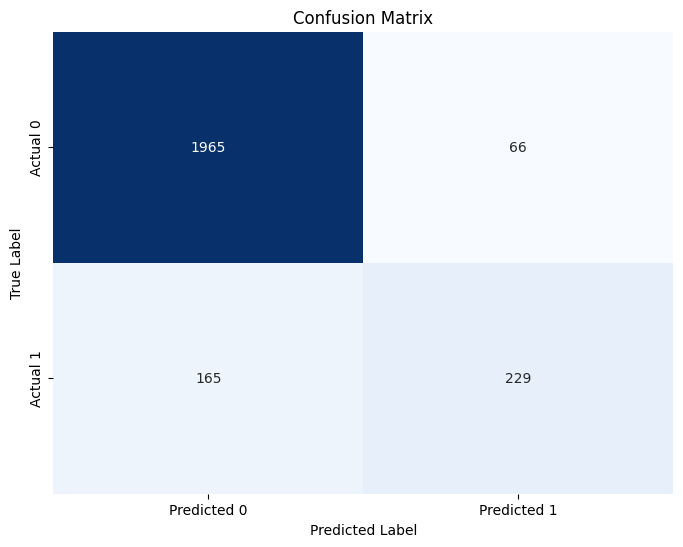

In [54]:
# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred2)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred2)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# Creating another random forest classifier, with the resampled data, and this time focusing on the precision
rf2 = RandomForestClassifier()

# Perform Grid Search with cross-validation
grid_search2 = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=5, scoring='precision', verbose=20)
grid_search2.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params2 = grid_search2.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 1/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 2/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50
[CV 3/5; 1/432] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 1/432] START bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=

D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "D:\Ironhack\Data_Analytics\Week_9\Final_project\venv\Lib\site-packages\sklearn\base.py", l

In [56]:
display(best_params2)

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [57]:
rf_model2 = grid_search2.best_estimator_

# Saving the best model to a pickle file
rf_model2_path = os.path.join(models_folder, 'random_forest_model2.pkl')
with open(rf_model2_path, 'wb') as file:
    pickle.dump(rf_model2, file)

In [58]:
# Loading the best model from the pickle file
with open(rf_model2_path, 'rb') as file:
    loaded_rf_model2 = pickle.load(file)

In [59]:
# Predicting y using the loaded model
y_pred3 = loaded_rf_model2.predict(X_test)

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      2031
         1.0       0.58      0.81      0.68       394

    accuracy                           0.87      2425
   macro avg       0.77      0.85      0.80      2425
weighted avg       0.90      0.87      0.88      2425

Kappa score: 0.599


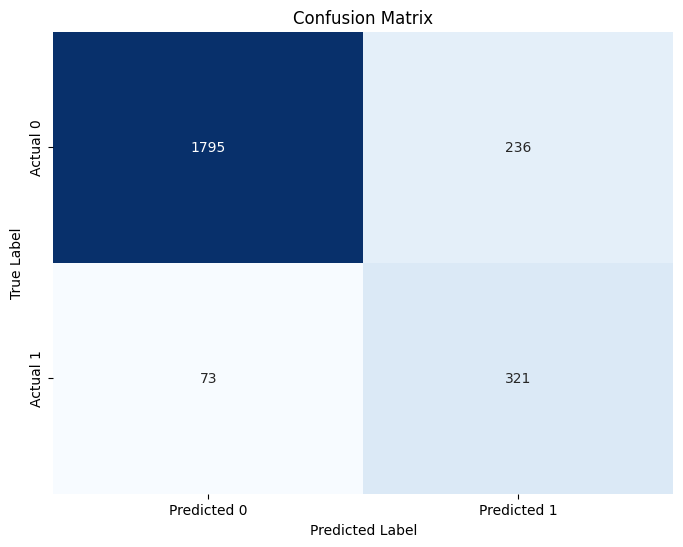

In [60]:
# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred3)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred3)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# K-NN Model

In [61]:
# Using the original dataset to fit the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_model1 = KNeighborsClassifier(n_neighbors=3)
knn_model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
# Saving the model
knn1_path = os.path.join(models_folder, 'knn_model1.pkl')
with open(knn1_path, 'wb') as file:
    pickle.dump(knn_model1, file)

In [63]:
# Loading the model
with open(knn1_path, 'rb') as file:
    loaded_knn1 = pickle.load(file)

In [64]:
y_pred_knn1 = loaded_knn1.predict(X_test)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      2031
         1.0       0.68      0.55      0.61       394

    accuracy                           0.88      2425
   macro avg       0.80      0.75      0.77      2425
weighted avg       0.88      0.88      0.88      2425

Kappa score: 0.539


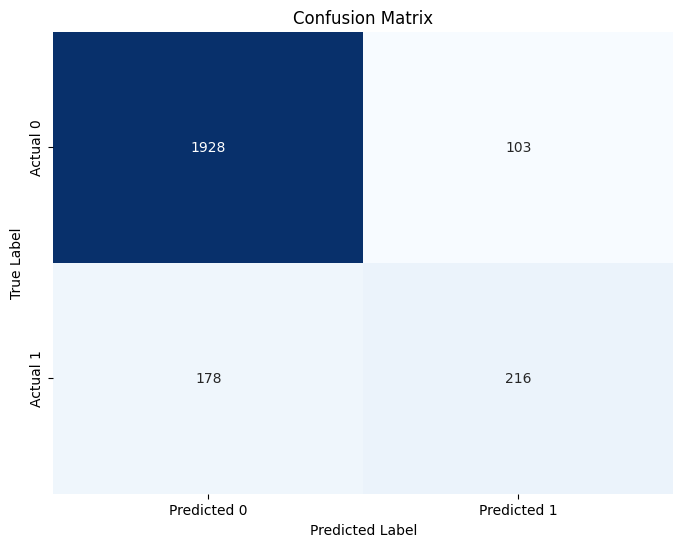

In [65]:
# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred_knn1)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred_knn1)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred_knn1)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# Using the resampled dataset
knn_model2= KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [67]:
# Saving the model
knn2_path = os.path.join(models_folder, 'knn_model2.pkl')
with open(knn2_path, 'wb') as file:
    pickle.dump(knn_model2, file)

In [68]:
# Loading the model
with open(knn2_path, 'rb') as file:
    loaded_knn2 = pickle.load(file)

In [69]:
y_pred_knn2 = loaded_knn2.predict(X_test)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      2031
         1.0       0.51      0.75      0.61       394

    accuracy                           0.84      2425
   macro avg       0.73      0.80      0.76      2425
weighted avg       0.88      0.84      0.85      2425

Kappa score: 0.515


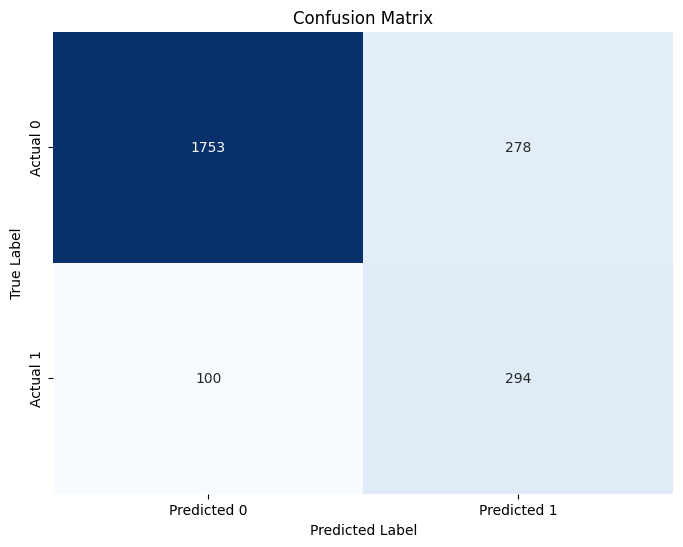

In [70]:
# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred_knn2)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred_knn2)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred_knn2)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# KNN with Gridsearch

In [71]:
# KNN using gridsearch and prioritizing accuracy
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 15, 20]}
knn2 = KNeighborsClassifier()
grid_search3 = GridSearchCV(knn2, param_grid, cv=5, scoring='accuracy', verbose=20)
grid_search3.fit(X_train_resampled, y_train_resampled)
best_n_neighbors = grid_search3.best_params_['n_neighbors']

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START n_neighbors=1...............................................
[CV 1/5; 1/7] END ................n_neighbors=1;, score=0.930 total time=   0.3s
[CV 2/5; 1/7] START n_neighbors=1...............................................
[CV 2/5; 1/7] END ................n_neighbors=1;, score=0.931 total time=   0.2s
[CV 3/5; 1/7] START n_neighbors=1...............................................
[CV 3/5; 1/7] END ................n_neighbors=1;, score=0.932 total time=   0.2s
[CV 4/5; 1/7] START n_neighbors=1...............................................
[CV 4/5; 1/7] END ................n_neighbors=1;, score=0.931 total time=   0.3s
[CV 5/5; 1/7] START n_neighbors=1...............................................
[CV 5/5; 1/7] END ................n_neighbors=1;, score=0.932 total time=   0.2s
[CV 1/5; 2/7] START n_neighbors=3...............................................
[CV 1/5; 2/7] END ................n_neighbors=3;,

In [72]:
best_n_neighbors

1

In [73]:
## KNN using gridsearch and prioritizing precision
knn3 = KNeighborsClassifier()
grid_search4 = GridSearchCV(knn2, param_grid, cv=5, scoring='precision', verbose=20)
grid_search4.fit(X_train_resampled, y_train_resampled)
best_n_neighbors2 = grid_search4.best_params_['n_neighbors']
best_n_neighbors2

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START n_neighbors=1...............................................
[CV 1/5; 1/7] END ................n_neighbors=1;, score=0.893 total time=   0.3s
[CV 2/5; 1/7] START n_neighbors=1...............................................
[CV 2/5; 1/7] END ................n_neighbors=1;, score=0.891 total time=   0.3s
[CV 3/5; 1/7] START n_neighbors=1...............................................
[CV 3/5; 1/7] END ................n_neighbors=1;, score=0.890 total time=   0.3s
[CV 4/5; 1/7] START n_neighbors=1...............................................
[CV 4/5; 1/7] END ................n_neighbors=1;, score=0.887 total time=   0.3s
[CV 5/5; 1/7] START n_neighbors=1...............................................
[CV 5/5; 1/7] END ................n_neighbors=1;, score=0.890 total time=   0.3s
[CV 1/5; 2/7] START n_neighbors=3...............................................
[CV 1/5; 2/7] END ................n_neighbors=3;,

1

In [74]:
# Prioritizing accuracy and prioritizing precision both resulted in a 1 neighbor
# I will fit the knn classifier using 1 neighbour and the resampled dataset
knn_model_grid= KNeighborsClassifier(n_neighbors=1)
knn_model_grid.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=1)

In [75]:
y_pred_knn3 = knn_model_grid.predict(X_test)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      2031
         1.0       0.56      0.62      0.59       394

    accuracy                           0.86      2425
   macro avg       0.74      0.76      0.75      2425
weighted avg       0.87      0.86      0.86      2425

Kappa score: 0.504


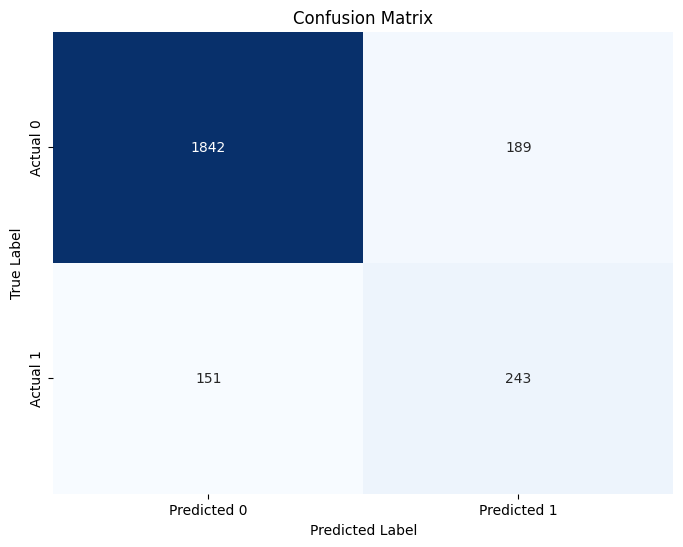

In [76]:
# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred_knn3)
print(f'Accuracy: {accuracy:.2f}')

# Printing the classification report
class_report = classification_report(y_test, y_pred_knn3)
print('Classification Report:')
print(class_report)

# kappa score
kappa = cohen_kappa_score(y_test, y_pred_knn3)
print(f'Kappa score: {kappa:.3f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

After trying logistic regression, random forest, and K-NN, I concluded that:
Random forest prioritizing accuracy is the best performing model

In [77]:
# Saving the model
knn3_path = os.path.join(models_folder, 'knn_with_gridsearch.pkl')
with open(knn3_path, 'wb') as file:
    pickle.dump(knn_model_grid, file)